## Logistic regresion for Student Performance data:

In [234]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance



In [235]:
# Read data from excel file
df = pd.read_csv('../data/Student_performance_data.csv')

# Preview data
display(df.head())

# Data Info
display(df.info())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


None

## Explanitory Data

In [236]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


## Histogram Visualization 

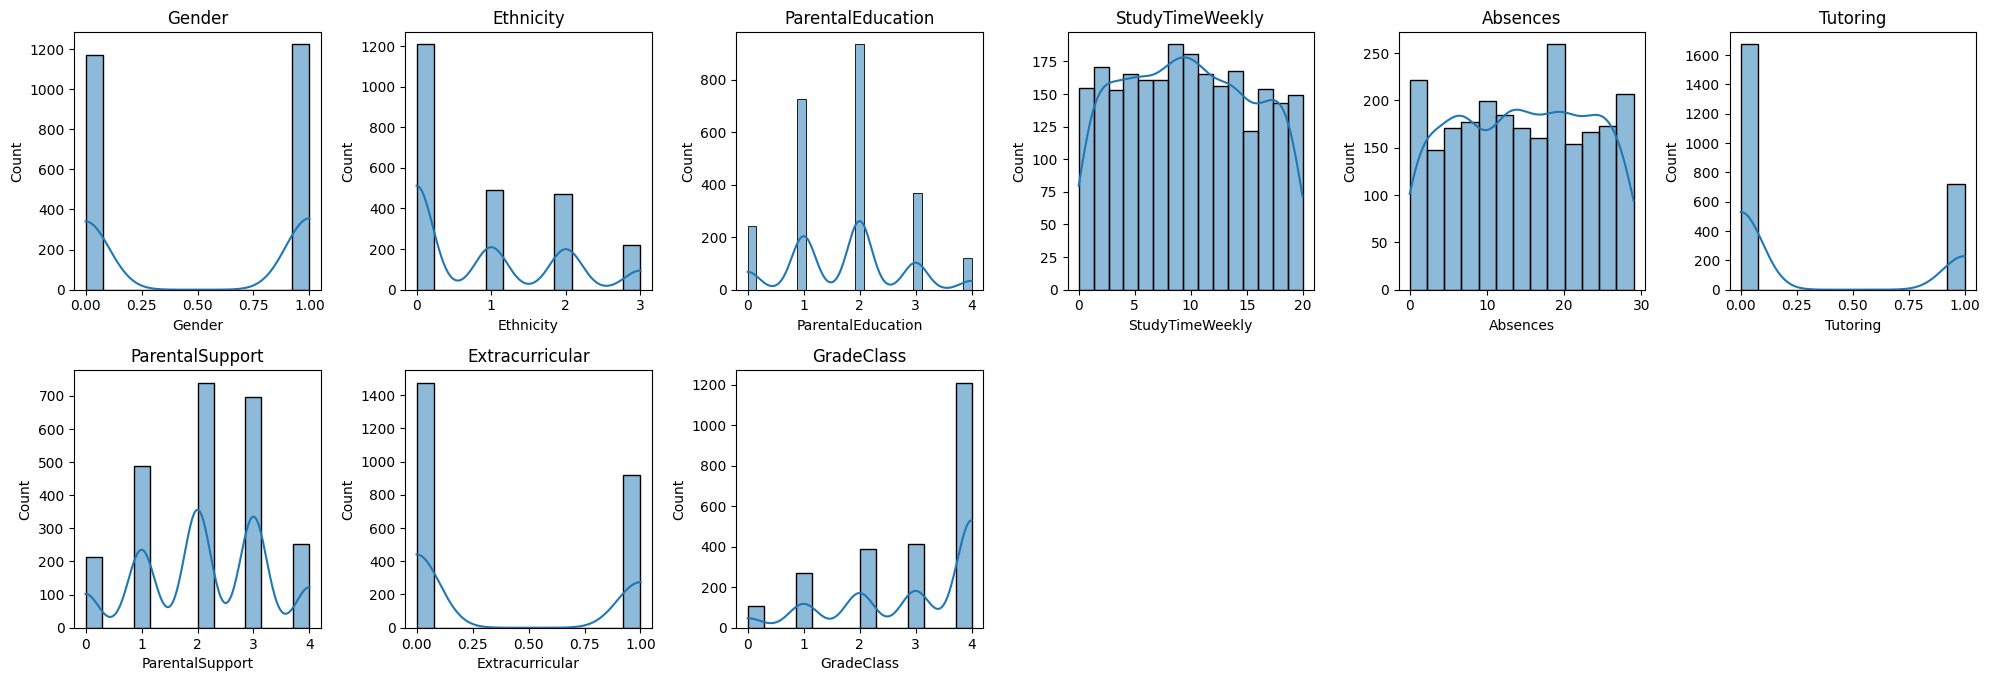

In [237]:
# Exclude unneeded variables
df_cleaned = df.drop(columns=[
    'Age','GPA', 'Music', 'Volunteering',
    'Sports', 'StudentID'
])
# Outer Figure Size
plt.figure(figsize=(20, 20))
for i, col in enumerate(df_cleaned.columns):
# Inner Layout    
    plt.subplot(6, 6, i+1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(col)
    plt.tight_layout()
plt.show()

## Box Plot Visualization 

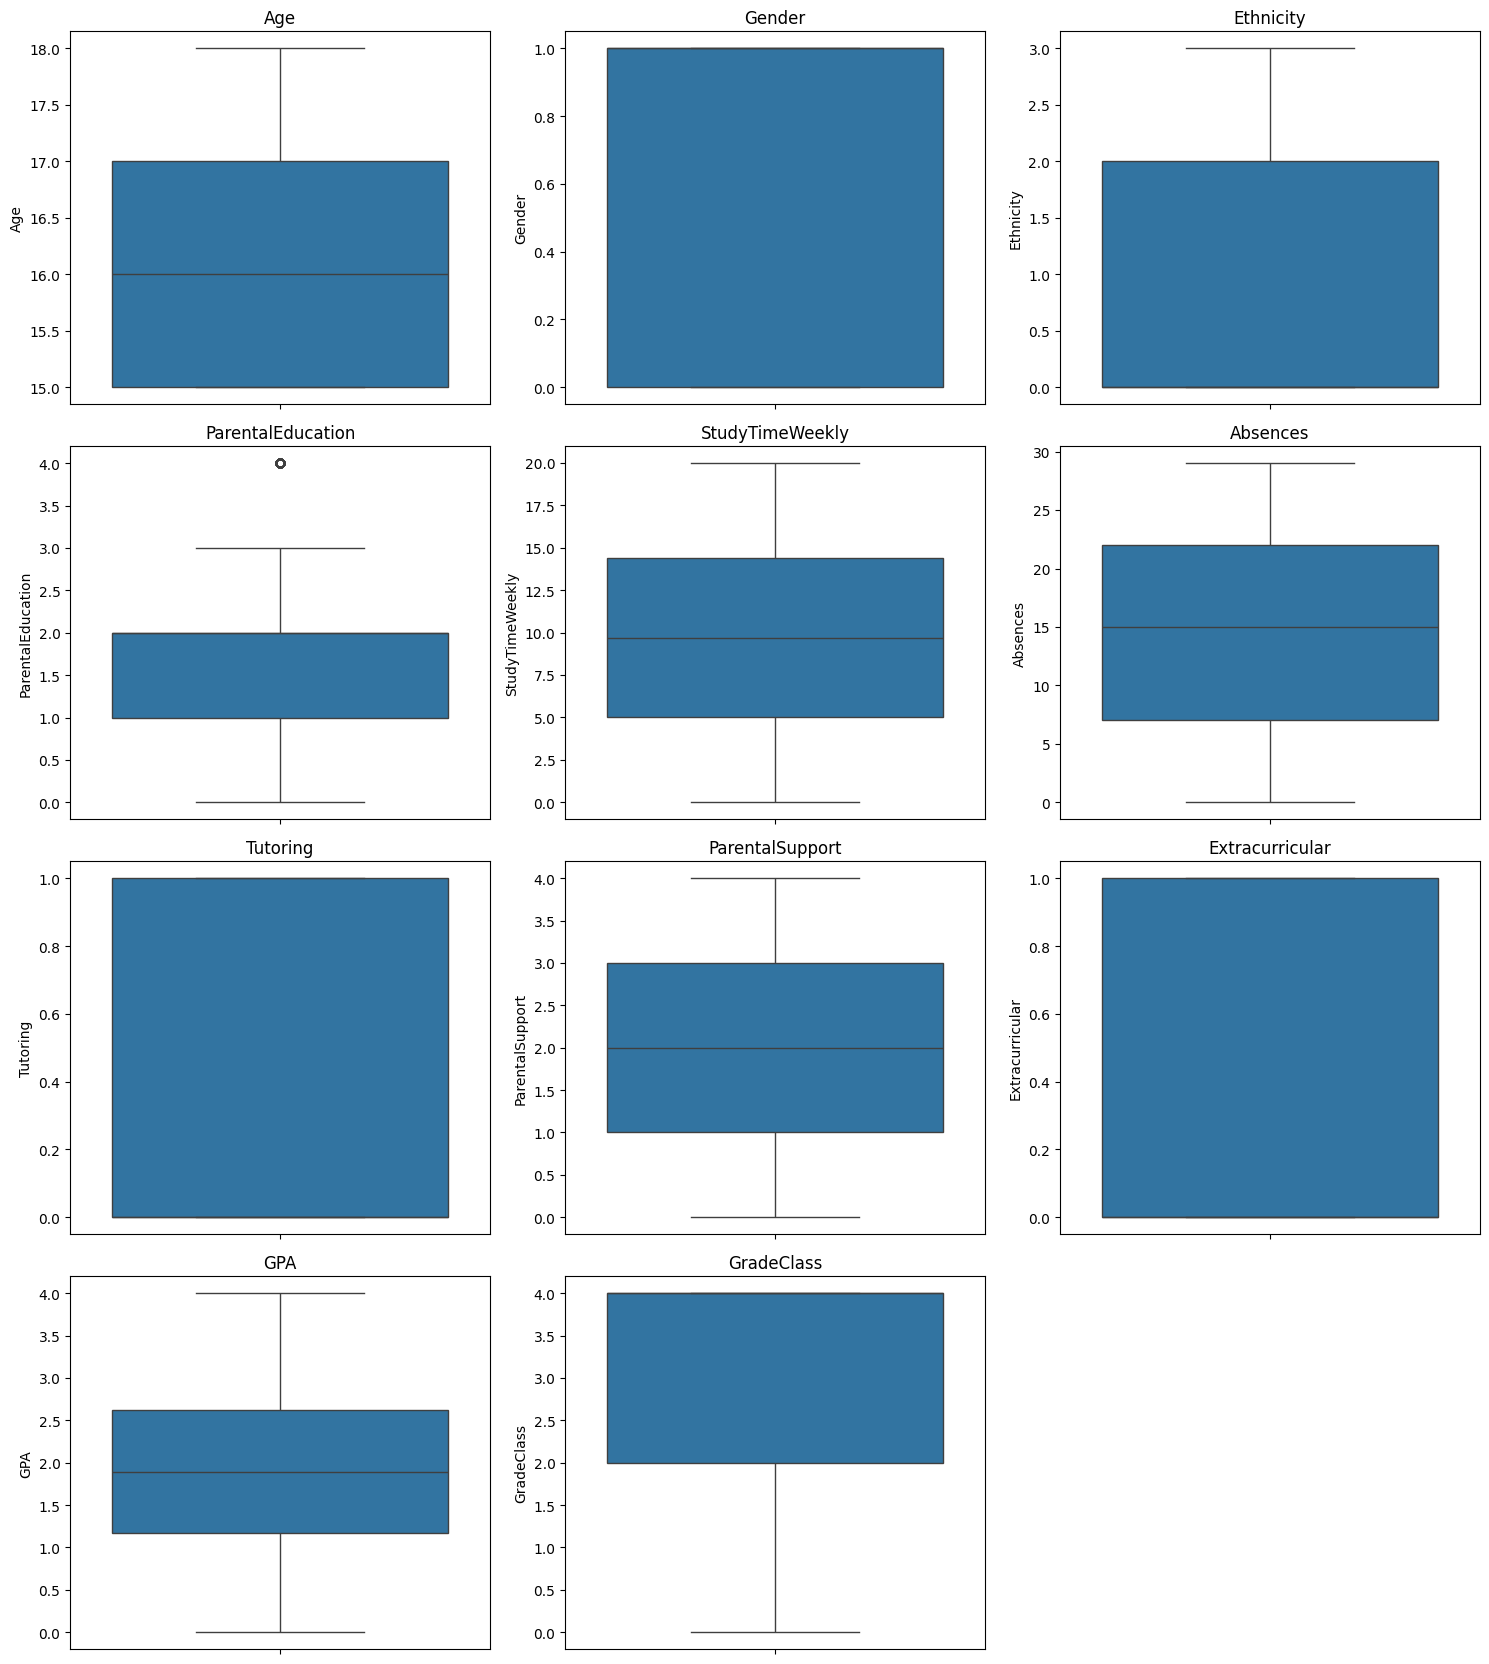

In [238]:
# Exclude unneeded variables
df_cleaned = df.drop(columns=[
   'Music', 'Volunteering','Sports', 'StudentID'
])
# Outer Figure Size
plt.figure(figsize=(15, 25))
for i, col in enumerate(df_cleaned.columns):
# Inner Layout    
    plt.subplot(6, 3, i+1)
    sns.boxplot(df_cleaned[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

## Relationship Visualization 

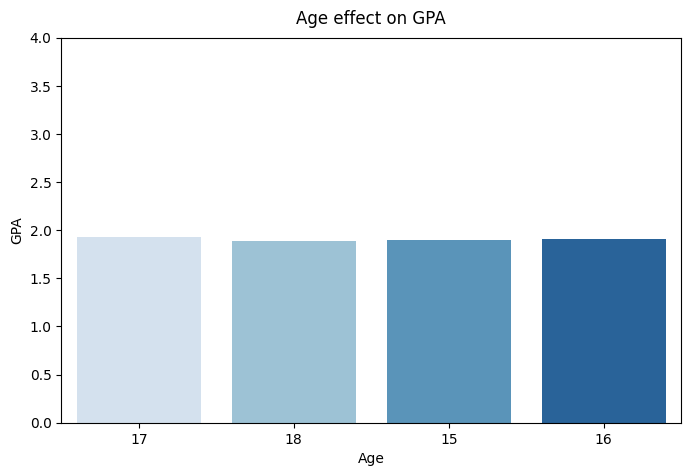

In [239]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Gender','Ethnicity','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as 15, 1 as 16, 2 as 17 and 3 as 18 
if "Age" in df_cleaned.columns: df_cleaned["Age"] = df_cleaned["Age"].map({15: "15", 16: "16", 17: "17", 18: "18"})

# Plot
if all(col in df_cleaned.columns for col in ["Age", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="Age", y="GPA", errorbar=None, palette="Blues", hue="Age", legend=False )
    
    # Lable Axis and Titel
    plt.title("Age effect on GPA", pad=10)
    plt.xlabel("Age")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

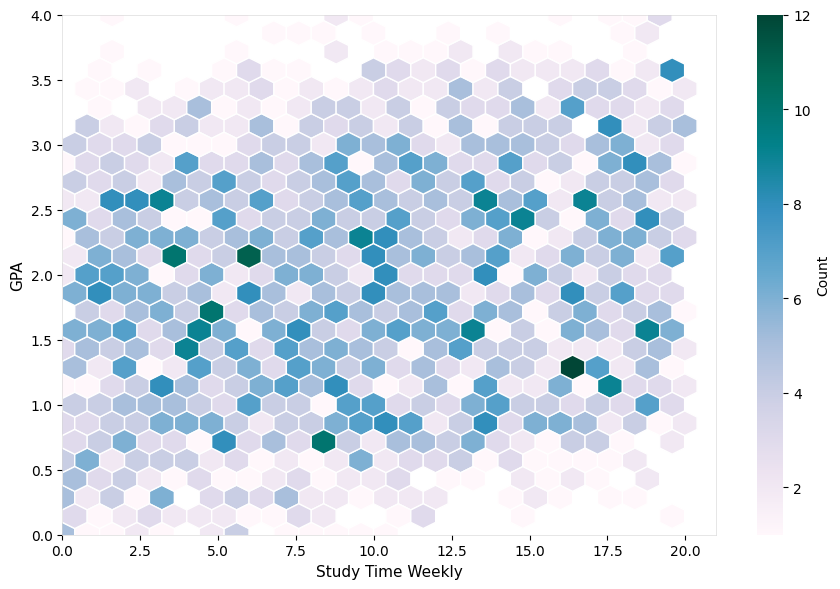

In [240]:
plt.figure(figsize=(9, 6))

# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass','Absences'])


# Hexagon Ploting structure
hb = plt.hexbin( df["StudyTimeWeekly"], df["GPA"], gridsize=25, cmap="PuBuGn", mincnt=1, edgecolor="white")  

# Sidebar
cb = plt.colorbar(hb, label="Count")
cb.outline.set_visible(False)

# Axis limits
plt.xlim(0, 21)
plt.ylim(0, 4)

# Labels
plt.xlabel("Study Time Weekly", fontsize=11)
plt.ylabel("GPA", fontsize=11)

# Remove grid
plt.grid(False)

# Axis borders
for spine in plt.gca().spines.values():
    spine.set_color("lightgray")
    spine.set_linewidth(0.4)

plt.tight_layout()
plt.show()

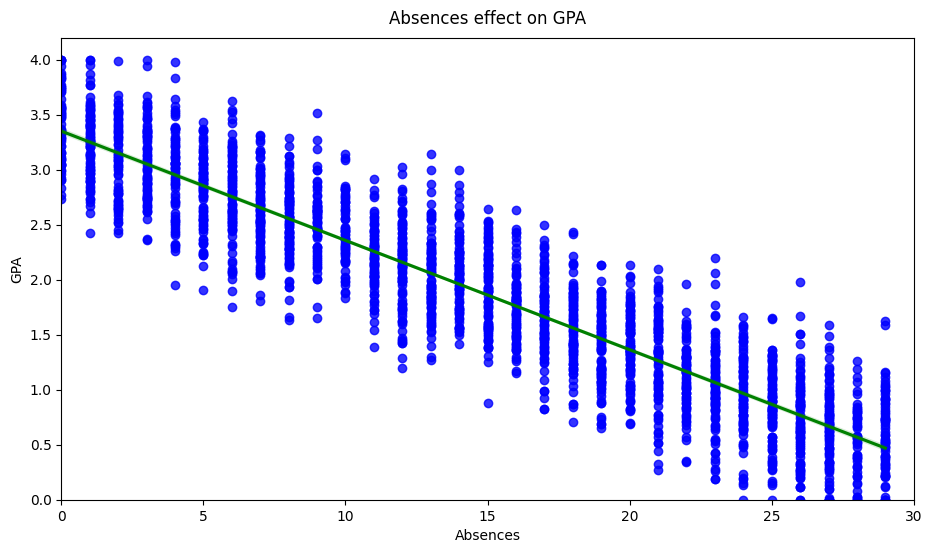

In [241]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Scatter plot with regression line
plt.figure(figsize=(11, 6))
sns.regplot(x="Absences", y="GPA", data=df_cleaned, color="b", line_kws={'color':'green'}) 

# Axis limits
plt.xlim(0, df_cleaned['Absences'].max() + 1)
plt.ylim(0, df_cleaned['GPA'].max() + 0.2)

plt.title("Absences effect on GPA", pad=10)
plt.show()

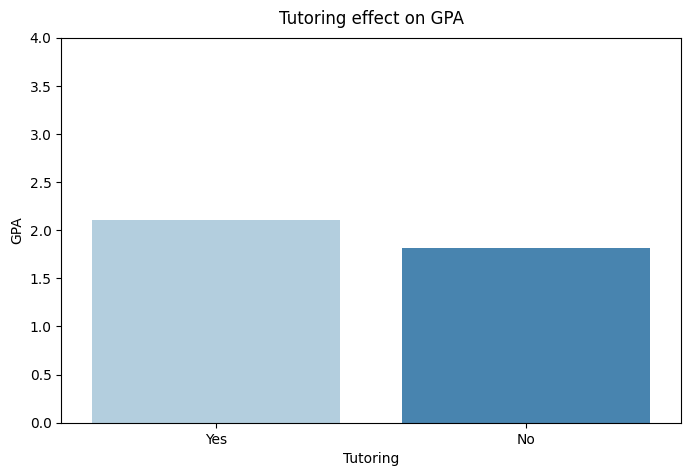

In [242]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass','Absences'])

# Display 0 as NO and 1 As Yes
if "Tutoring" in df_cleaned.columns: df_cleaned["Tutoring"] = df_cleaned["Tutoring"].map({0: "No", 1: "Yes"})

# Plot
if all(col in df_cleaned.columns for col in ["Tutoring", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="Tutoring", y="GPA", errorbar=None, palette="Blues", hue="Tutoring" )
    
    # Lable Axis and Titel
    plt.title("Tutoring effect on GPA", pad=10)
    plt.xlabel("Tutoring")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

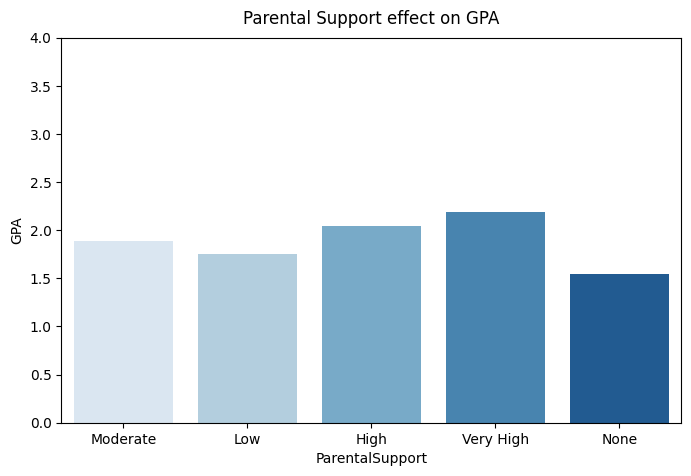

In [243]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as None, 1 as Low, 2 as Moderate, 3 as High and 4 as Very High
if "ParentalSupport" in df_cleaned.columns: df_cleaned["ParentalSupport"] = df_cleaned["ParentalSupport"].map({0: "None", 1: "Low", 2: "Moderate", 3: "High", 4: "Very High"})

# Plot
if all(col in df_cleaned.columns for col in ["ParentalSupport", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="ParentalSupport", y="GPA", errorbar=None, palette="Blues", hue="ParentalSupport", legend=False )
    
    # Lable Axis and Titel
    plt.title("Parental Support effect on GPA", pad=10)
    plt.xlabel("ParentalSupport")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

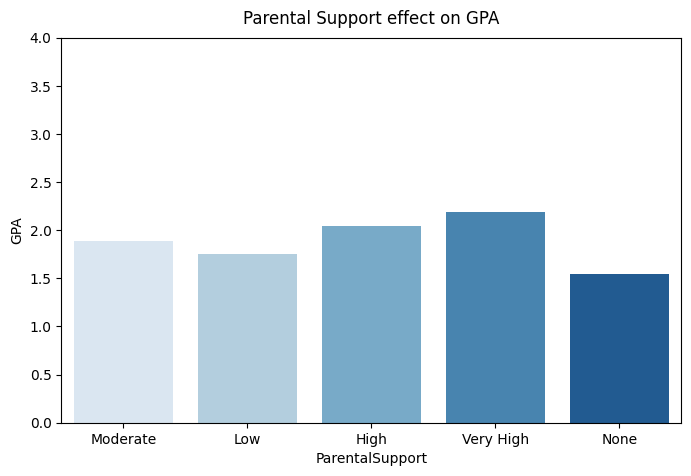

In [244]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as None, 1 as Low, 2 as Moderate, 3 as High and 4 as Very High
if "ParentalSupport" in df_cleaned.columns: df_cleaned["ParentalSupport"] = df_cleaned["ParentalSupport"].map({0: "None", 1: "Low", 2: "Moderate", 3: "High", 4: "Very High"})

# Plot
if all(col in df_cleaned.columns for col in ["ParentalSupport", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="ParentalSupport", y="GPA", errorbar=None, palette="Blues", hue="ParentalSupport", legend=False )
    
    # Lable Axis and Titel
    plt.title("Parental Support effect on GPA", pad=10)
    plt.xlabel("ParentalSupport")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

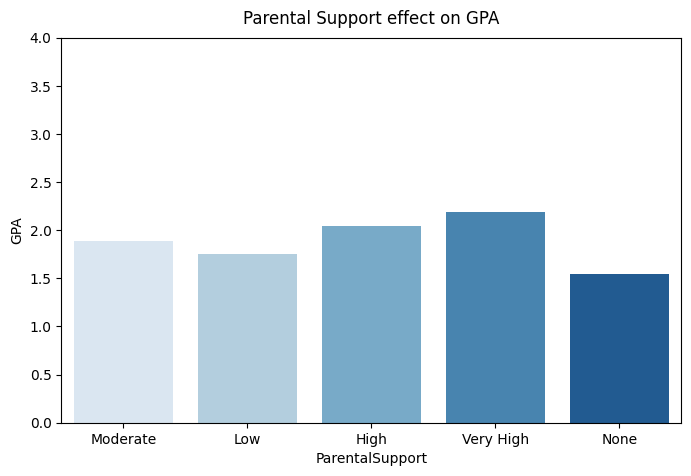

In [245]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as None, 1 as Low, 2 as Moderate, 3 as High and 4 as Very High
if "ParentalSupport" in df_cleaned.columns: df_cleaned["ParentalSupport"] = df_cleaned["ParentalSupport"].map({0: "None", 1: "Low", 2: "Moderate", 3: "High", 4: "Very High"})

# Plot
if all(col in df_cleaned.columns for col in ["ParentalSupport", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="ParentalSupport", y="GPA", errorbar=None, palette="Blues", hue="ParentalSupport", legend=False )
    
    # Lable Axis and Titel
    plt.title("Parental Support effect on GPA", pad=10)
    plt.xlabel("ParentalSupport")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

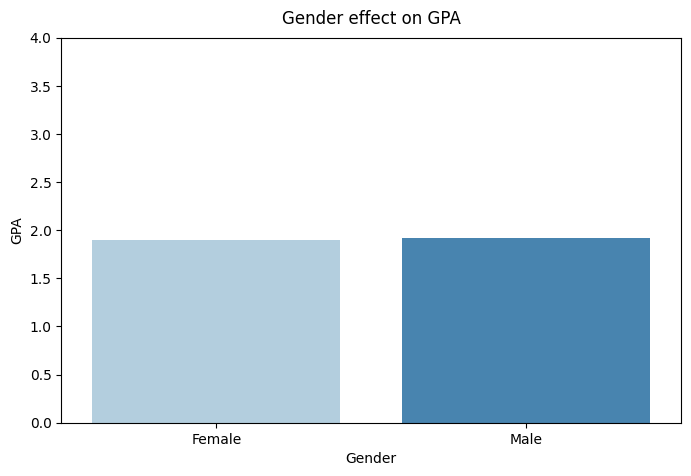

In [246]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as Male and 1 as Female
if "Gender" in df_cleaned.columns: df_cleaned["Gender"] = df_cleaned["Gender"].map({0: "Male", 1: "Female"})

# Plot
if all(col in df_cleaned.columns for col in ["Gender", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="Gender", y="GPA", errorbar=None, palette="Blues", hue="Gender", legend=False )
    
    # Lable Axis and Titel
    plt.title("Gender effect on GPA", pad=10)
    plt.xlabel("Gender")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

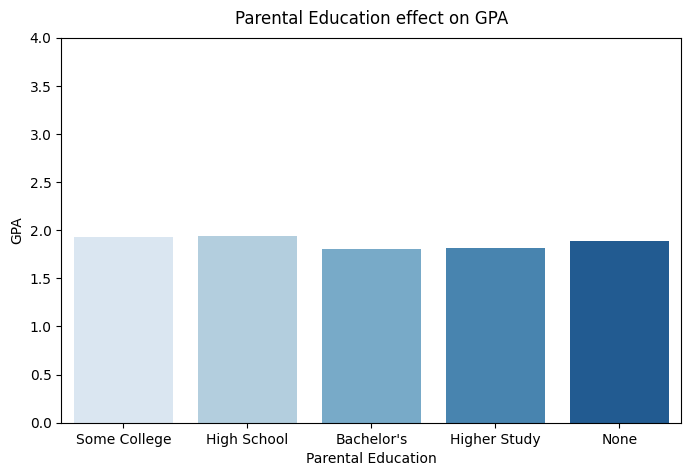

In [247]:
# Remove Unneeded Variables
df_cleaned = df.drop(columns=['StudentID','Age','Gender','Ethnicity','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GradeClass'])

# Display 0 as None, 1 as High School, 2 as Some College , 3 as Bachelor's  and 4 as Higher Study 
if "ParentalEducation" in df_cleaned.columns: df_cleaned["ParentalEducation"] = df_cleaned["ParentalEducation"].map({0: "None", 1: "High School", 2: "Some College", 3: "Bachelor's", 4: "Higher Study"})

# Plot
if all(col in df_cleaned.columns for col in ["ParentalEducation", "GPA"]):
    plt.figure(figsize=(8, 5))
    sns.barplot( data=df_cleaned, x="ParentalEducation", y="GPA", errorbar=None, palette="Blues", hue="ParentalEducation", legend=False )
    
    # Lable Axis and Titel
    plt.title("Parental Education effect on GPA", pad=10)
    plt.xlabel("Parental Education")
    plt.ylabel("GPA")
    plt.ylim(0, 4.0)
    plt.show()

## Logistic Regresion Model

In [248]:
# Feature engineering
def engineer_features(df):
    # Create copies
    df = df.copy()

In [249]:
# Grade Class is target veriable
# Get all rows and columns except the last one
X = df.iloc[:, :-1]  
# Get all rows and only the last column
y = df.iloc[:, -1]   

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

In [250]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [251]:
# Create and train model
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

[[  2  17   4   2   6]
 [  3  26  31   3   2]
 [  0  10  58  17   5]
 [  0   3  22  59  28]
 [  1   2   1   3 293]]

Test Accuracy is: 73.244 %


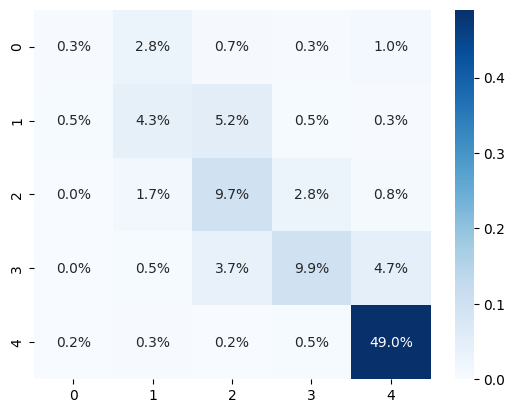

In [252]:
# Test Data
y_pred = logreg.predict(X_test_scaled)
cm_test = confusion_matrix(y_test, y_pred)
print(cm_test)
_ = sns.heatmap(cm_test/np.sum(cm_test), annot=True,cmap='Blues', fmt='.1%')

# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy is:", round(test_accuracy * 100,3,), "%" )

In [253]:
# Feature importance
result = permutation_importance(logreg, X_test_scaled, y_test, n_repeats=10,random_state=42)

# Create DataFrame to ignore negative values and sort values 
importance_df = pd.DataFrame({'Feature': X.columns,'Importance': result['importances_mean']}).query("Importance > 0").sort_values('Importance', ascending=False)

print(importance_df)

              Feature  Importance
13                GPA    0.366221
6            Absences    0.029599
7            Tutoring    0.008361
11              Music    0.006689
3           Ethnicity    0.005017
4   ParentalEducation    0.003177
1                 Age    0.001171
9     Extracurricular    0.001171
12       Volunteering    0.000502
